# CICERO SCM notebook 1

Import some stuff

In [12]:
import sys
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as pdt

Install the model, if needed

In [13]:
#!pip install -e ..


Import the model wrapper function

In [14]:
sys.path.append('../src')
from ciceroscm import CICEROSCM

set up input/output directories

In [15]:
#cscm = CICEROSCM()
# outdir_save = os.path.join(os.getcwd(), "output")
#outdir = os.getcwd()+'/output/'
#if not os.path.exists(outdir):
#    os.makedirs(outdir)
test_data_dir = os.getcwd()+'/../tests/test-data'
test_data_dir 

'/home/sanderson/ciceroscm/notebooks/../tests/test-data'

Run the model

In [16]:
scen = 'test'
cscm=CICEROSCM({
            "gaspamfile": os.path.join(test_data_dir, "gases_v1RCMIP.txt"),
            "output_prefix": outdir,
            "emstart": 1850,   
            "nystart": 1750,
            "nyend": 2100,
            "concentrations_file": os.path.join(test_data_dir, "ssp245_conc_RCMIP.txt"),
            "emissions_file": os.path.join(test_data_dir, "ssp245_em_RCMIP.txt"),
            "nat_ch4_file": os.path.join(test_data_dir, "natemis_ch4.txt"),
            "nat_n2o_file": os.path.join(test_data_dir, "natemis_n2o.txt"),
            "idtm":24,
        })
cscm._run({
            "results_as_dict":True
        },
    pamset_udm={"threstemp": 7.0, #scales vertical velocity as a function of mixed layer temperature
                    "rlamdo":16.0,#air-sea heat exchange coefficient (wm^-2K^-1)
                    "akapa":0.634, #vertical heat diffusivity
                    "cpi":0.4, #temperature change ratio: polar to nonpolar region
                    "W":4, #vertical velocity (m/yr)
                    "beto":3.5, #ocean interhemispheric heat exchange coeff (Wm^-2K^-1)
                    "lambda":0.54,
                    "mixed":60.0,  #mixed layer depth
                    "foan":0.61, #fraction of northern hemisphere covered by ocean
                    "foas":0.81, #fraction of northern hemisphere covered by ocean
                    "ebbeta":0.0,#atmospheric interhemispheric heat exchange 
                    "fnso":0.7531, #ocean area ratio, northern to southern hemisphere
                    "lm":40, #number of vertical layers
                    "ldtime":12,
                   },
    pamset_emiconc={"lamb": 0.8,
                    "qbmb":0.03,
                    "qo3":0.4,
                    "qdirso2":-.457,
                    "qindso2":-.514,
                    "qbc":.2,
                    "qoc":-.103,
                    "ref_yr":2010,
                    "idtm":24},
    )

Parameter idtm not in pamset. Using default value 24
/home/sanderson/ciceroscm/src/ciceroscm/concentrations_emissions_handler.py:751: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_gas["NAT_EM"][tracer] = self.nat_emis_ch4["CH4"][yr]
/home/sanderson/ciceroscm/src/ciceroscm/concentrations_emissions_handler.py:754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_gas["NAT_EM"][tracer] = self.nat_emis_n2o["N2O"][yr]


Read model output into Pandas dataframes

In [17]:
required=dict.fromkeys(['nystart','nyend'])

In [18]:
required

{'nystart': None, 'nyend': None}

In [19]:
pamset_emiconc={"lamb": 0.8,
                    "qbmb":0.03,
                    "qo3":0.4,
                    "qdirso2":-.457,
                    "qindso2":-.514,
                    "qbc":.2,
                    "qoc":-.103,
                    "ref_yr":2010,
                    "idtm":24}

In [20]:
type(pamset_emiconc)

dict

In [21]:
cscm.results.keys()

dict_keys(['OHC700', 'OHCTOT', 'RIB_glob', 'RIB_N', 'RIB_S', 'dT_glob', 'dT_NH', 'dT_SH', 'dT_glob_air', 'dT_NH_air', 'dT_SH_air', 'dT_glob_sea', 'dT_NH_sea', 'dT_SHsea', 'dSL(m)', 'dSL_thermal(m)', 'dSL_ice(m)', 'Total_forcing', 'emissions', 'concentrations', 'forcing'])

In [24]:
#temperature
df_temp=cscm.results['dT_glob']#pd.read_csv(outdir+'/output_temp.txt', sep='\t', index_col=0)
#concentrations
df_conc=cscm.results['concentrations']#pd.read_csv(outdir+'/output_conc.txt', sep='\t', index_col=0)
#emissions
df_em=cscm.results['emissions']#pd.read_csv(outdir+'/output_em.txt', sep='\t', index_col=0)
#forcing
df_forc=cscm.results['forcing']#pd.read_csv(outdir+'/output_forc.txt', sep='\t', index_col=0)
#ocean heat content
df_ohc=cscm.results['OHCTOT']#pd.read_csv(outdir+'/output_ohc.txt', sep='\t', index_col=0)
#rib
df_rib=cscm.results['RIB_glob']#pd.read_csv(outdir+'/output_rib.txt', sep='\t', index_col=0)
df_comp =pd.read_csv(test_data_dir + '/gases_v1RCMIP.txt', sep='\t', index_col=0)


In [27]:
df_temp

array([-3.41240290e-04, -1.32287167e-03, -1.88926677e-03, -2.16667632e-03,
       -2.32674998e-03, -2.42894603e-03, -2.46719437e-03, -2.47068214e-03,
       -2.48077489e-03, -2.46537850e-03, -2.45505278e-03, -2.46384118e-03,
       -2.43450131e-03, -2.35100377e-03, -2.22954078e-03, -2.07766794e-03,
       -1.93421487e-03, -1.76760932e-03, -1.60478869e-03, -1.47262443e-03,
       -1.31310835e-03, -1.13438996e-03, -9.05877823e-04, -6.59093797e-04,
       -4.45806985e-04, -2.72963993e-04, -7.15198282e-05,  1.48885927e-04,
        3.39981148e-04,  5.09244747e-04,  6.98885891e-04,  8.82143088e-04,
        1.08048554e-03,  1.29509412e-03,  1.50577368e-03,  1.71146898e-03,
        1.89954241e-03,  2.08870797e-03,  2.25236379e-03,  2.41482857e-03,
        2.61655497e-03,  2.83045826e-03,  3.06487939e-03,  3.30193720e-03,
        3.52274670e-03,  3.72535671e-03,  3.96163138e-03,  4.21557117e-03,
        4.44677437e-03,  4.68690221e-03,  4.95553205e-03,  5.22563415e-03,
        5.51002157e-03,  

Plot some output

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

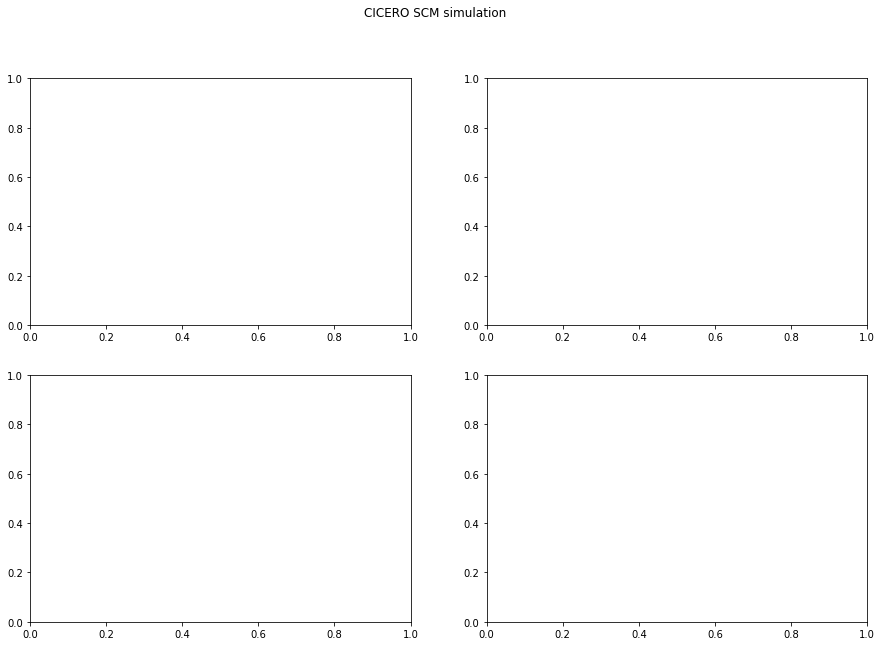

In [26]:


fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
axs=axs.flatten()
fig.suptitle('CICERO SCM simulation')

df_temp['dT_glob'].plot(ylabel='(K)',ax=axs[0])
df_temp['dT_NH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
df_temp['dT_SH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
axs[0].legend(['Global mean temperature','NH temperature','SH temperature'])

df_conc['CO2'].plot(ylabel='(ppm)',ax=axs[1])
axs[1].legend([r'CO$_2$ concentration'])

df_em['CO2'].plot(ylabel='(GtC)',ax=axs[2])
axs[2].legend([r'CO$_2$ emission'])

df_forc['Total_forcing'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3])
df_forc['CO2'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3],linestyle=':')
df_forc['CH4'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3],linestyle=':')
df_forc['LANDUSE'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3],linestyle=':')

axs[3].legend([r'Total','CO$_2$','CH$_4$','Land Use'])

Plot concentrations

In [ ]:
complist = np.arange(0,len(df_conc.columns))
fig, axs = plt.subplots(nrows=12, ncols=4,sharex=True,figsize=(15,30))
axs=axs.flatten()
fig.suptitle('CICERO SCM simulation, concentrations')
for i,c in enumerate(complist):

    comp = df_conc.columns[c]
    df_conc[comp].plot(ylabel='Conc. ['+df_comp.loc[comp]['CONC_UNIT']+']',
                       ax=axs[i],label=scen)
    axs[i].set_title(comp)
    axs[i].legend()
    axs[i].set_ylim(bottom=0)


In [ ]:
scen = 'a4x'
cscm._run(
        {
            "gaspamfile": os.path.join(test_data_dir, "gases_v1RCMIP.txt"),
            "output_prefix": outdir,
            "nyend": 2100,
            "concentrations_file": os.path.join(test_data_dir, "ssp245_conc_RCMIP.txt"),
            "emissions_file": os.path.join(test_data_dir, "ssp245_em_RCMIP.txt"),
            "nat_ch4_file": os.path.join(test_data_dir, "natemis_ch4.txt"),
            "nat_n2o_file": os.path.join(test_data_dir, "natemis_n2o.txt"),
            "conc_run":True,
            "results_as_dict":True
        },
        pamset_udm={"threstemp": 7.0, #scales vertical velocity as a function of mixed layer temperature
                    "rlamdo":16.0,#air-sea heat exchange coefficient (wm^-2K^-1)
                    "akapa":0.634, #vertical heat diffusivity
                    "cpi":0.4, #temperature change ratio: polar to nonpolar region
                    "W":4, #vertical velocity (m/yr)
                    "beto":3.5, #ocean interhemispheric heat exchange coeff (Wm^-2K^-1)
                    "lambda":0.54,
                    "mixed":60.0,  #mixed layer depth
                    "foan":0.61, #fraction of northern hemisphere covered by ocean
                    "foas":0.81, #fraction of northern hemisphere covered by ocean
                    "ebbeta":0.0,#atmospheric interhemispheric heat exchange 
                    "fnso":0.7531, #ocean area ratio, northern to southern hemisphere
                    "lm":40, #number of vertical layers
                    "ldtime":12
                   },
        pamset_emiconc={"lamb": 0.8,
                    "qbmb":0.03,
                    "qo3":0.4,
                    "qdirso2":-.457,
                    "qindso2":-.514,
                    "qbc":.2,
                    "qoc":-.103,
                    "ref_yr":2010,
                    "idtm":24},
    )

In [ ]:
cscm.results.keys()

In [ ]:
plt.plot(cscm.results['dT_glob'])